Prepared by: **Ripan Debnath**

*Problem statement* :
<br>The following dataset consists of 1030 instances with 9 attributes and has no missing values. There are 8 input variables and 1 output variable. Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). The target variable is Concrete Compressive Strength measured in (Mega Pascal). Build a Neural network model to predict the compressive strength.

In [17]:
#importing required libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [6]:
#loading dataset
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [7]:
duplicate = data. duplicated()

In [8]:
sum(duplicate)

25

In [9]:
data = data. drop_duplicates()

In [10]:
data. isna(). sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [14]:
import pylab
import scipy. stats as stats
import matplotlib. pylab as plt

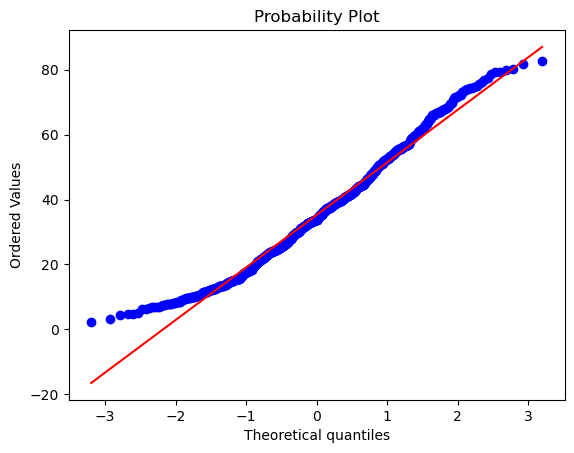

In [15]:
stats. probplot(data["strength"], dist = 'norm', plot = pylab); plt.show()

<AxesSubplot: >

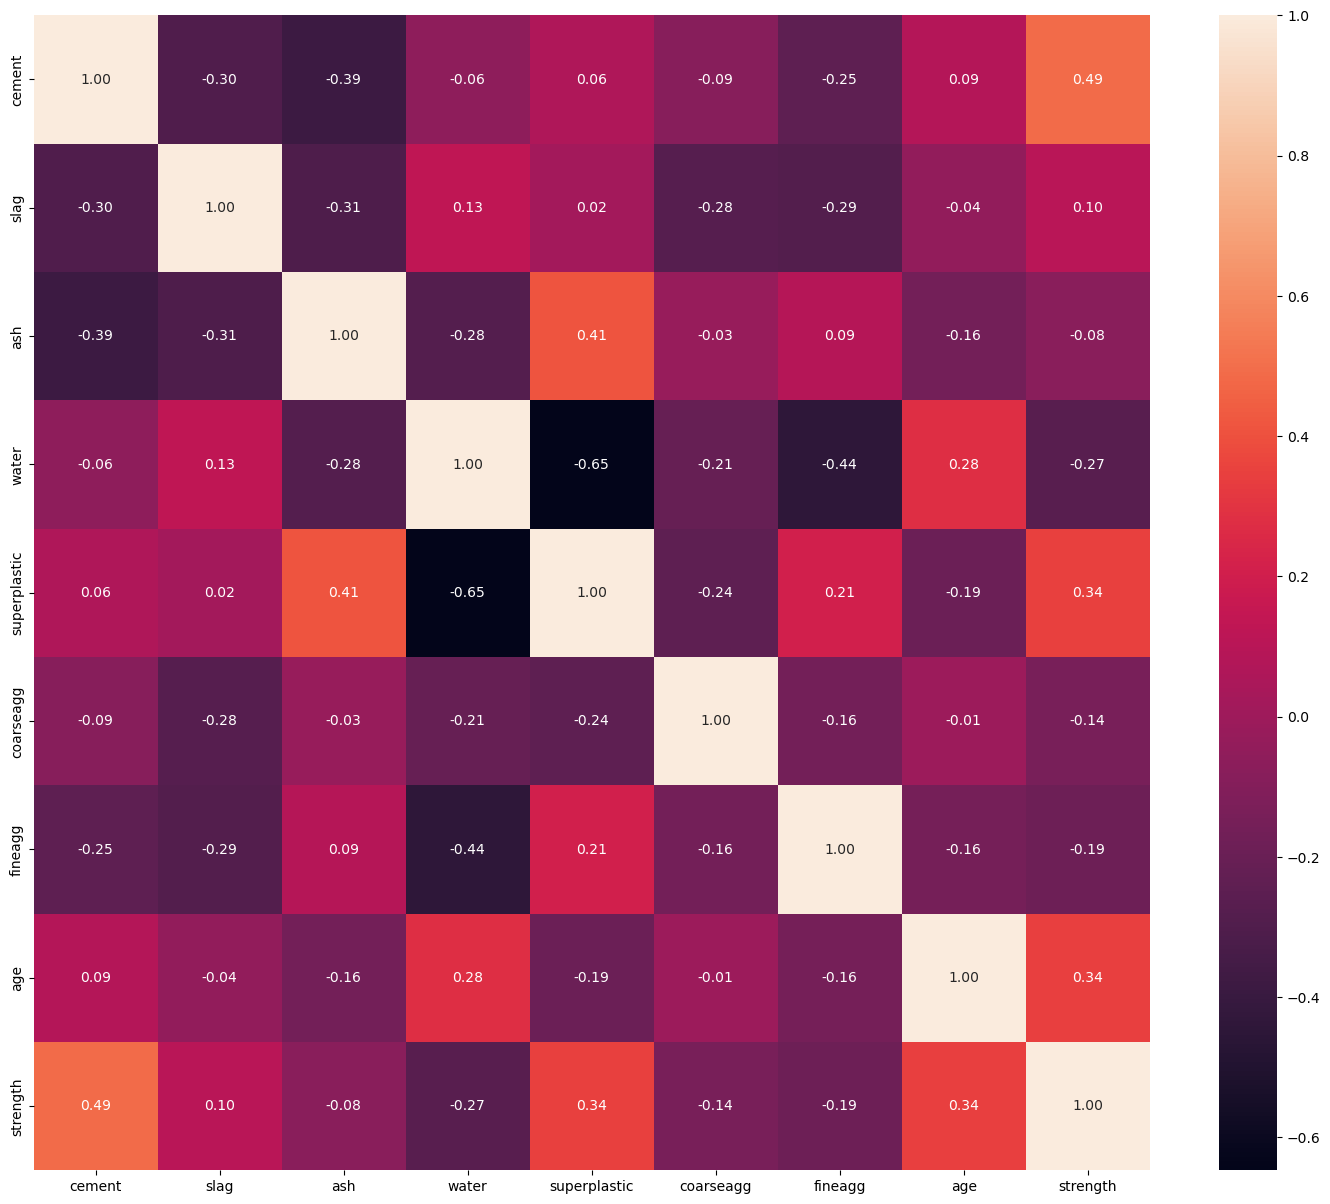

In [18]:
plt. figure(figsize = (18, 15))
sns. heatmap(data. corr(), annot = True, fmt = ".2f")

In [19]:
#seperating target and input data
x=data.drop("strength",axis=1)
y=data.strength

In [20]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =1)
x_train.shape

(703, 8)

In [21]:
#standardizing data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test =  scale.fit_transform(x_test)

In [22]:
#defining model
def design_mlp():
    # Initializing the model 
    model = Sequential()
    model.add(Dense(15,input_dim =8,activation="relu"))
    model.add(Dense(50,activation="relu"))
    model.add(Dense(7,activation="relu"))
    model.add(Dense(1,activation="relu"))
    model.compile(loss="mean_squared_error",optimizer="RMSprop",metrics=["RootMeanSquaredError"])
    return model

model = design_mlp()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                135       
                                                                 
 dense_1 (Dense)             (None, 50)                800       
                                                                 
 dense_2 (Dense)             (None, 7)                 357       
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 1,300
Trainable params: 1,300
Non-trainable params: 0
_________________________________________________________________


In [24]:
#fitting model
model.fit(x=x_train,y=y_train,batch_size=1,epochs=100)


Epoch 1/100
703/703 [==============================] - 3s 2ms/step - loss: 745.0347 - root_mean_squared_error: 27.2953
Epoch 2/100
703/703 [==============================] - 1s 2ms/step - loss: 229.3181 - root_mean_squared_error: 15.1433
Epoch 3/100
703/703 [==============================] - 1s 2ms/step - loss: 182.2665 - root_mean_squared_error: 13.5006
Epoch 4/100
703/703 [==============================] - 1s 2ms/step - loss: 164.9827 - root_mean_squared_error: 12.8446
Epoch 5/100
703/703 [==============================] - 1s 2ms/step - loss: 148.2694 - root_mean_squared_error: 12.1766
Epoch 6/100
703/703 [==============================] - 1s 2ms/step - loss: 138.5075 - root_mean_squared_error: 11.7689
Epoch 7/100
703/703 [==============================] - 1s 2ms/step - loss: 128.0484 - root_mean_squared_error: 11.3158
Epoch 8/100
703/703 [==============================] - 1s 2ms/step - loss: 127.8797 - root_mean_squared_error: 11.3084
Epoch 9/100
703/703 [===========================

In [26]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 45.6453 - root_mean_squared_error: 6.7561


[45.645267486572266, 6.756128311157227]

we can see our model is giving 6.75 as error value